In [1]:
# importing libraries
import pandas as pd
import numpy as np

# read the data in a pandas dataframe
data = pd.read_csv(r'C:\Users\DELL\Downloads\austin_weather.csv')

# drop or delete the unnecessary columns in the data.
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches',
'SeaLevelPressureLowInches'], axis = 1)

# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
data = data.replace('T', 0.0)

# the data also contains '-' which indicates no
# or NIL. This means that data is not available
# we need to replace these values as well.
data = data.replace('-', 0.0)

# save the data in a csv file
data.to_csv('austin_final.csv')


The precipitation in inches for the input is: [[1.33868402]]
the precipitation trend graph: 


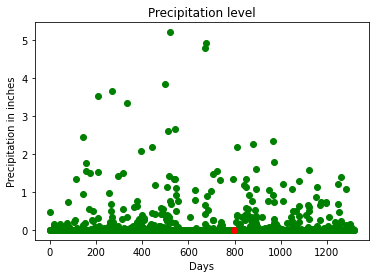

Precipitation vs selected attributes graph: 


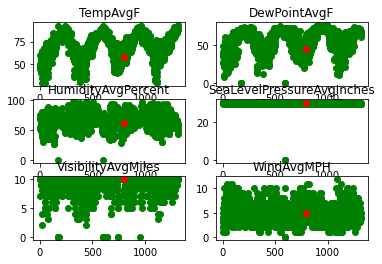

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# read the cleaned data
data = pd.read_csv("austin_final.csv")

# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label
X = data.drop(['PrecipitationSumInches'], axis = 1)

# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)

# consider a random day in the dataset
# we shall plot a graph and observe this
# day
day_index = 798
days = [i for i in range(Y.size)]

# initialize a linear regression classifier
clf = LinearRegression()
# train the classifier with our
# input data.
clf.fit(X, Y)

# give a sample input to test our model
# this is a 2-D vector that contains values
# for each column in the dataset.
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
				[57], [29.68], [10], [7], [2], [0], [20], [4], [31]])
inp = inp.reshape(1, -1)

# print the output.
print('The precipitation in inches for the input is:', clf.predict(inp))

# plot a graph of the precipitation levels
# versus the total number of days.
# one day, which is in red, is
# tracked here. It has a precipitation
# of approx. 2 inches.
print("the precipitation trend graph: ")
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color ='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")


plt.show()
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
				'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
				'WindAvgMPH'], axis = 1)

# plot a graph with a few features (x values)
# against the precipitation or rainfall to observe
# the trends

print("Precipitation vs selected attributes graph: ")

for i in range(x_vis.columns.size):
	plt.subplot(3, 2, i + 1)
	plt.scatter(days, x_vis[x_vis.columns.values[i][:100]],
											color = 'g')

	plt.scatter(days[day_index],
				x_vis[x_vis.columns.values[i]][day_index],
				color ='r')

	plt.title(x_vis.columns.values[i])

plt.show()


In [3]:
data.corr()

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
Unnamed: 0,1.000000,0.183866,0.191919,0.190205,0.194715,0.204818,0.208228,0.078141,0.052896,0.021617,-0.006422,0.039851,0.084237,0.054802,-0.059665,-0.053671,-0.039783,-0.014928
TempHighF,0.183866,1.000000,0.970655,0.881977,0.744612,0.755616,0.725671,0.123647,-0.116141,-0.256256,-0.148704,-0.028280,0.226655,0.190855,0.012029,-0.009297,0.027676,-0.069869
TempAvgF,0.191919,0.970655,1.000000,0.968573,0.808014,0.837222,0.820421,0.192456,0.022763,-0.096187,-0.138524,-0.043128,0.148463,0.100722,0.014119,0.034267,0.026663,-0.020442
TempLowF,0.190205,0.881977,0.968573,1.000000,0.832384,0.877662,0.874380,0.252131,0.165002,0.074977,-0.119066,-0.042962,0.064996,0.002420,0.015882,0.076016,0.024319,0.034315
DewPointHighF,0.194715,0.744612,0.808014,0.832384,1.000000,0.967754,0.898026,0.510722,0.409717,0.263818,0.128351,0.250751,0.077431,-0.130295,0.117151,0.074983,0.125768,0.136159
DewPointAvgF,0.204818,0.755616,0.837222,0.877662,0.967754,1.000000,0.967514,0.520575,0.450622,0.317731,0.101505,0.216995,0.056602,-0.129497,0.054142,0.038257,0.062522,0.127040
DewPointLowF,0.208228,0.725671,0.820421,0.874380,0.898026,0.967514,1.000000,0.481106,0.458124,0.355761,0.080703,0.184720,0.064665,-0.104077,-0.013514,0.001407,-0.008039,0.126493
HumidityHighPercent,0.078141,0.123647,0.192456,0.252131,0.510722,0.520575,0.481106,1.000000,0.828398,0.553781,0.054354,0.084664,-0.304546,-0.477612,0.013986,-0.086840,0.004679,0.219735
HumidityAvgPercent,0.052896,-0.116141,0.022763,0.165002,0.409717,0.450622,0.458124,0.828398,1.000000,0.923541,0.069634,0.062050,-0.449230,-0.600088,0.024878,-0.000472,0.017390,0.341382
HumidityLowPercent,0.021617,-0.256256,-0.096187,0.074977,0.263818,0.317731,0.355761,0.553781,0.923541,1.000000,0.066901,0.035198,-0.459657,-0.566181,0.026541,0.058757,0.023175,0.359194


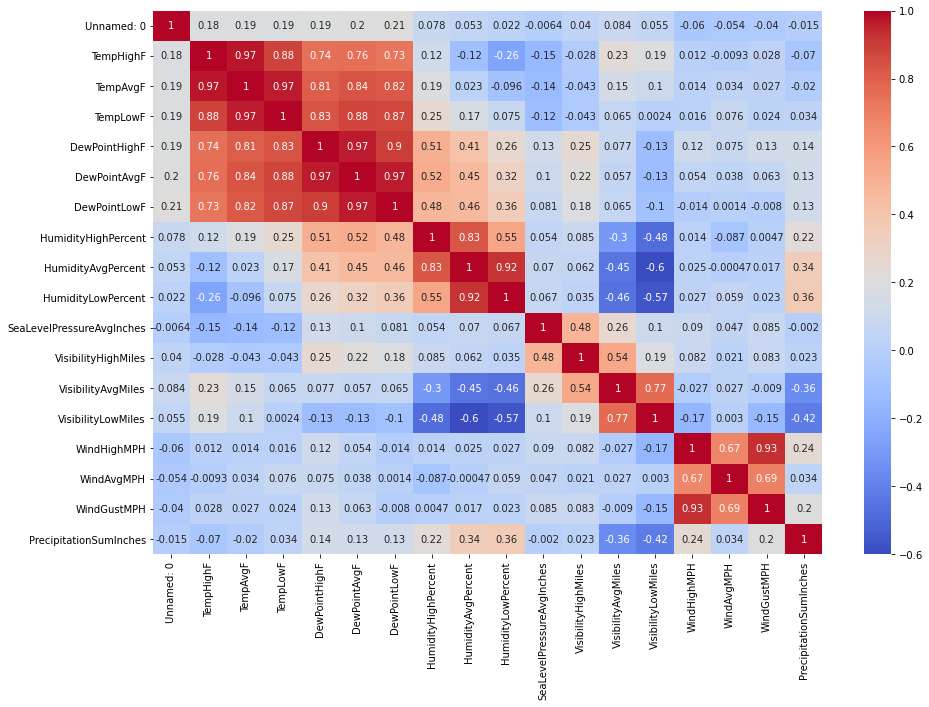

In [4]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

def get_correlated(cor):
    correlated =set()
    for i in cor.columns:
        for j in cor.columns:
            if cor[i][j]>0.7 or cor[i][j]>-0.7 and i!=j:
                correlated.add(i)
                correlated.add(j)
    print("The Correlated columns: {}".format(list(correlated)))
    return correlated

In [5]:
correlated = get_correlated(data.corr())

The Correlated columns: ['Unnamed: 0', 'WindHighMPH', 'DewPointHighF', 'VisibilityLowMiles', 'WindGustMPH', 'WindAvgMPH', 'TempAvgF', 'HumidityHighPercent', 'SeaLevelPressureAvgInches', 'VisibilityHighMiles', 'TempLowF', 'HumidityAvgPercent', 'PrecipitationSumInches', 'VisibilityAvgMiles', 'DewPointAvgF', 'HumidityLowPercent', 'DewPointLowF', 'TempHighF']


In [6]:
def outlier(data):
    out1=[]
    for col in data.columns:
        outliers =[]
        mean = data[col].mean()
        std = data[col].std()
        for i in data[col]:
                z = (i - mean)/std
                if z>2:
                    outliers.append(i)
        out1.append(list(outliers))
        print("There are {} outliers in {} feature".format(len(outliers),col))
    return out1


In [7]:
out = outlier(data)

There are 0 outliers in Unnamed: 0 feature
There are 0 outliers in TempHighF feature
There are 0 outliers in TempAvgF feature
There are 0 outliers in TempLowF feature
There are 0 outliers in DewPointHighF feature
There are 0 outliers in DewPointAvgF feature
There are 0 outliers in DewPointLowF feature
There are 0 outliers in HumidityHighPercent feature
There are 22 outliers in HumidityAvgPercent feature
There are 63 outliers in HumidityLowPercent feature
There are 0 outliers in SeaLevelPressureAvgInches feature
There are 0 outliers in VisibilityHighMiles feature
There are 0 outliers in VisibilityAvgMiles feature
There are 0 outliers in VisibilityLowMiles feature
There are 48 outliers in WindHighMPH feature
There are 31 outliers in WindAvgMPH feature
There are 41 outliers in WindGustMPH feature
There are 50 outliers in PrecipitationSumInches feature


In [8]:
j =0
columns =data.columns
for i in out:
    for val in data[columns[j]]:
        if val in i:
            data[columns[j]]= data[columns[j]].replace(val,np.nan)
    j =j+1

In [9]:
data.isnull().sum()

Unnamed: 0                    0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent           22
HumidityLowPercent           63
SeaLevelPressureAvgInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                  48
WindAvgMPH                   31
WindGustMPH                  41
PrecipitationSumInches       50
dtype: int64

In [10]:
data.dropna(axis = 0,inplace =True)

In [11]:
data.isnull().sum()

Unnamed: 0                   0
TempHighF                    0
TempAvgF                     0
TempLowF                     0
DewPointHighF                0
DewPointAvgF                 0
DewPointLowF                 0
HumidityHighPercent          0
HumidityAvgPercent           0
HumidityLowPercent           0
SeaLevelPressureAvgInches    0
VisibilityHighMiles          0
VisibilityAvgMiles           0
VisibilityLowMiles           0
WindHighMPH                  0
WindAvgMPH                   0
WindGustMPH                  0
PrecipitationSumInches       0
dtype: int64